<b><font size=2>CS395f20-b.us - CS397f20-a.us - Introduction to Data Analyisis</b>
<br><br>
<b>Final</b>
<br><br>
<b>Your name: Junki Kim</b>
<br><br>
<b>Submit file: Final_Junki_Kim.ipynb</b>
<br><br>
<b><font color="red">Due date:	Monday, 7 December 2020, 11:55 PM</font></b>
</font>


Import NumPy and MatPlotLib:

In [1]:
import pandas as pd                     # using 'pd'  is standard by Python users
from pandas import DataFrame            # optional, good practice
from pandas import Series               # optional, good practice

import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime
from datetime import timedelta

%matplotlib inline

In [2]:
!pip install gmaps

In [3]:
!jupyter nbextension enable --py --sys-prefix widgetsnbextension
!jupyter nbextension enable --py --sys-prefix gmaps

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [4]:
import gmaps
import gmaps.datasets

In [5]:
# read a csv file into a dataframe
df = pd.read_csv('Bing-COVID19-Data.csv', encoding="utf8")
df = df[df['ID'] != 5483544]
df = df[df['Updated'] <= '10/31/2020']
df.fillna(value=0, inplace=True)

dfo = pd.read_csv('owid-covid-data.csv', encoding="utf8")

In [6]:
# check data by each region

# 231 country
key_list = list(df['Country_Region'].unique())

#check maximum confirmed, find country which have most case 
data_list = []
for i in key_list:
    data_list.append(df[df['Country_Region']==i]['Confirmed'].max())
    
df_maxcon = pd.DataFrame(data_list, key_list, columns=['maxcon'])
df_maxcon.sort_values(by=['maxcon']).tail(10).iloc[::-1]
df_maxcon['country'] = key_list

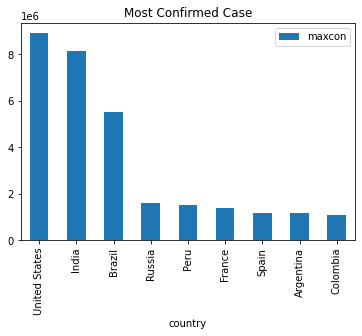

In [7]:
df_maxcon = df_maxcon[df_maxcon['country']!='Worldwide']
df_maxcon
df_most = df_maxcon.sort_values(by=['maxcon']).tail(9).iloc[::-1]
df_most.plot(x ='country', y='maxcon', kind = 'bar')
plt.title("Most Confirmed Case")
plt.show()

In [8]:
df_latlong = df[['Latitude', 'Longitude']]
weights = df['Confirmed']
df_layer = gmaps.heatmap_layer(df_latlong, weights=weights, max_intensity=100, point_radius=20)
fig = gmaps.figure()
fig.add_layer(df_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [9]:
# choose 10 country which have most case
df_US = df[df['Country_Region']=='United States']
df_IN = df[df['Country_Region']=='India']
df_BR = df[df['Country_Region']=='Brazil']
df_RU = df[df['Country_Region']=='Russia']
df_FR = df[df['Country_Region']=='France']
df_PE = df[df['Country_Region']=='Peru']
df_SP = df[df['Country_Region']=='Spain']
df_AR = df[df['Country_Region']=='Argentina']
df_CO = df[df['Country_Region']=='Colombia']

#get monthly data
df_US.index = pd.to_datetime(df_US['Updated'],format='%m/%d/20%y')
US_maxcon = df_US.groupby(by=[df_US.index.month])['Confirmed'].max()
US_sumcc = df_US.groupby(by=[df_US.index.month])['ConfirmedChange'].sum()
US_maxdea = df_US.groupby(by=[df_US.index.month])['Deaths'].max()
US_sumdc = df_US.groupby(by=[df_US.index.month])['DeathsChange'].sum()
US_maxrec = df_US.groupby(by=[df_US.index.month])['Recovered'].max()
US_sumrc = df_US.groupby(by=[df_US.index.month])['RecoveredChange'].sum()

df_IN.index = pd.to_datetime(df_IN['Updated'],format='%m/%d/20%y')
IN_maxcon = df_IN.groupby(by=[df_IN.index.month])['Confirmed'].max()
IN_sumcc = df_IN.groupby(by=[df_IN.index.month])['ConfirmedChange'].sum()
IN_maxdea = df_IN.groupby(by=[df_IN.index.month])['Deaths'].max()
IN_sumdc = df_IN.groupby(by=[df_IN.index.month])['DeathsChange'].sum()
IN_maxrec = df_IN.groupby(by=[df_IN.index.month])['Recovered'].max()
IN_sumrc = df_IN.groupby(by=[df_IN.index.month])['RecoveredChange'].sum()

df_BR.index = pd.to_datetime(df_BR['Updated'],format='%m/%d/20%y')
BR_maxcon = df_BR.groupby(by=[df_BR.index.month])['Confirmed'].max()
BR_sumcc = df_BR.groupby(by=[df_BR.index.month])['ConfirmedChange'].sum()
BR_maxdea = df_BR.groupby(by=[df_BR.index.month])['Deaths'].max()
BR_sumdc = df_BR.groupby(by=[df_BR.index.month])['DeathsChange'].sum()
BR_maxrec = df_BR.groupby(by=[df_BR.index.month])['Recovered'].max()
BR_sumrc = df_BR.groupby(by=[df_BR.index.month])['RecoveredChange'].sum()

df_RU.index = pd.to_datetime(df_RU['Updated'],format='%m/%d/20%y')
RU_maxcon = df_RU.groupby(by=[df_RU.index.month])['Confirmed'].max()
RU_sumcc = df_RU.groupby(by=[df_RU.index.month])['ConfirmedChange'].sum()
RU_maxdea = df_RU.groupby(by=[df_RU.index.month])['Deaths'].max()
RU_sumdc = df_RU.groupby(by=[df_RU.index.month])['DeathsChange'].sum()
RU_maxrec = df_RU.groupby(by=[df_RU.index.month])['Recovered'].max()
RU_sumrc = df_RU.groupby(by=[df_RU.index.month])['RecoveredChange'].sum()

df_FR.index = pd.to_datetime(df_FR['Updated'],format='%m/%d/20%y')
FR_maxcon = df_FR.groupby(by=[df_FR.index.month])['Confirmed'].max()
FR_sumcc = df_FR.groupby(by=[df_FR.index.month])['ConfirmedChange'].sum()
FR_maxdea = df_FR.groupby(by=[df_FR.index.month])['Deaths'].max()
FR_sumdc = df_FR.groupby(by=[df_FR.index.month])['DeathsChange'].sum()
FR_maxrec = df_FR.groupby(by=[df_FR.index.month])['Recovered'].max()
FR_sumrc = df_FR.groupby(by=[df_FR.index.month])['RecoveredChange'].sum()

df_PE.index = pd.to_datetime(df_PE['Updated'],format='%m/%d/20%y')
PE_maxcon = df_PE.groupby(by=[df_PE.index.month])['Confirmed'].max()
PE_sumcc = df_PE.groupby(by=[df_PE.index.month])['ConfirmedChange'].sum()
PE_maxdea = df_PE.groupby(by=[df_PE.index.month])['Deaths'].max()
PE_sumdc = df_PE.groupby(by=[df_PE.index.month])['DeathsChange'].sum()
PE_maxrec = df_PE.groupby(by=[df_PE.index.month])['Recovered'].max()
PE_sumrc = df_PE.groupby(by=[df_PE.index.month])['RecoveredChange'].sum()

df_SP.index = pd.to_datetime(df_SP['Updated'],format='%m/%d/20%y')
SP_maxcon = df_SP.groupby(by=[df_SP.index.month])['Confirmed'].max()
SP_sumcc = df_SP.groupby(by=[df_SP.index.month])['ConfirmedChange'].sum()
SP_maxdea = df_SP.groupby(by=[df_SP.index.month])['Deaths'].max()
SP_sumdc = df_SP.groupby(by=[df_SP.index.month])['DeathsChange'].sum()
SP_maxrec = df_SP.groupby(by=[df_SP.index.month])['Recovered'].max()
SP_sumrc = df_SP.groupby(by=[df_SP.index.month])['RecoveredChange'].sum()

df_AR.index = pd.to_datetime(df_AR['Updated'],format='%m/%d/20%y')
AR_maxcon = df_AR.groupby(by=[df_AR.index.month])['Confirmed'].max()
AR_sumcc = df_AR.groupby(by=[df_AR.index.month])['ConfirmedChange'].sum()
AR_maxdea = df_AR.groupby(by=[df_AR.index.month])['Deaths'].max()
AR_sumdc = df_AR.groupby(by=[df_AR.index.month])['DeathsChange'].sum()
AR_maxrec = df_AR.groupby(by=[df_AR.index.month])['Recovered'].max()
AR_sumrc = df_AR.groupby(by=[df_AR.index.month])['RecoveredChange'].sum()

df_CO.index = pd.to_datetime(df_CO['Updated'],format='%m/%d/20%y')
CO_maxcon = df_CO.groupby(by=[df_CO.index.month])['Confirmed'].max()
CO_sumcc = df_CO.groupby(by=[df_CO.index.month])['ConfirmedChange'].sum()
CO_maxdea = df_CO.groupby(by=[df_CO.index.month])['Deaths'].max()
CO_sumdc = df_CO.groupby(by=[df_CO.index.month])['DeathsChange'].sum()
CO_maxrec = df_CO.groupby(by=[df_CO.index.month])['Recovered'].max()
CO_sumrc = df_CO.groupby(by=[df_CO.index.month])['RecoveredChange'].sum()


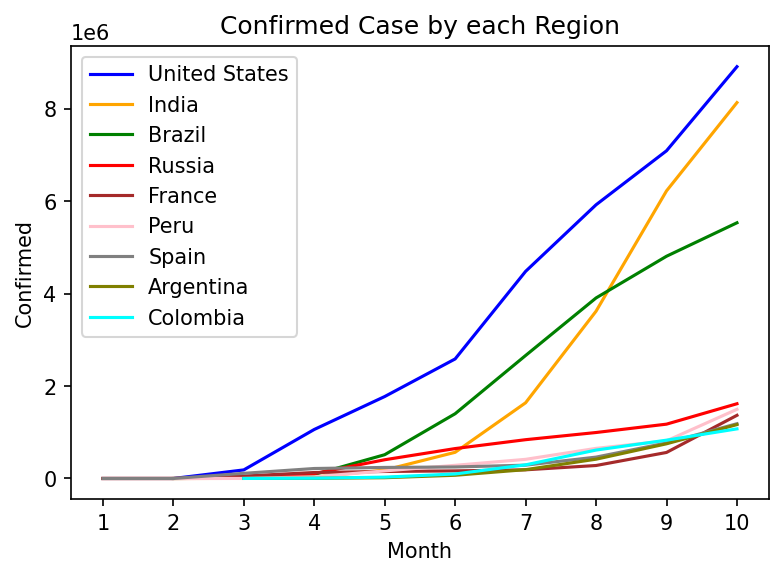

In [10]:

plt.figure(dpi=150)
plt.plot(US_maxcon.index, US_maxcon.values, color="blue")
plt.plot(IN_maxcon.index, IN_maxcon.values, color="orange")
plt.plot(BR_maxcon.index, BR_maxcon.values, color="green")
plt.plot(RU_maxcon.index, RU_maxcon.values, color="red")
plt.plot(FR_maxcon.index, FR_maxcon.values, color="brown")
plt.plot(PE_maxcon.index, PE_maxcon.values, color="pink")
plt.plot(SP_maxcon.index, SP_maxcon.values, color="gray")
plt.plot(AR_maxcon.index, AR_maxcon.values, color="olive")
plt.plot(CO_maxcon.index, CO_maxcon.values, color="cyan")
plt.ylabel('Confirmed', color="black")
plt.xlabel('Month', color="black")
plt.title('Confirmed Case by each Region', color="black")
plt.legend(['United States', 'India', 'Brazil', 'Russia', 'France', 'Peru', 'Spain','Argentina', 'Colombia'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

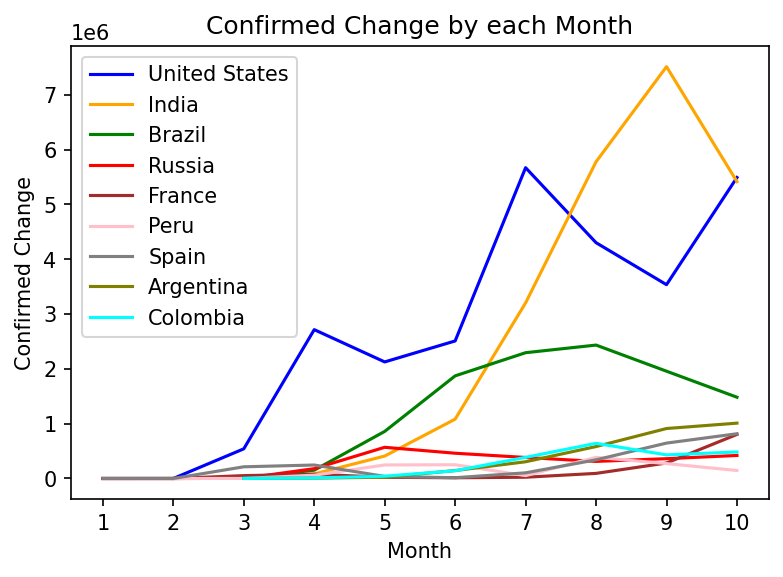

In [11]:
plt.figure(dpi=150)
plt.plot(US_sumcc.index, US_sumcc.values, color="blue")
plt.plot(IN_sumcc.index, IN_sumcc.values, color="orange")
plt.plot(BR_sumcc.index, BR_sumcc.values, color="green")
plt.plot(RU_sumcc.index, RU_sumcc.values, color="red")
plt.plot(FR_sumcc.index, FR_sumcc.values, color="brown")
plt.plot(PE_sumcc.index, PE_sumcc.values, color="pink")
plt.plot(SP_sumcc.index, SP_sumcc.values, color="gray")
plt.plot(AR_sumcc.index, AR_sumcc.values, color="olive")
plt.plot(CO_sumcc.index, CO_sumcc.values, color="cyan")
plt.ylabel('Confirmed Change', color="black")
plt.xlabel('Month', color="black")
plt.title('Confirmed Change by each Month', color="black")
plt.legend(['United States', 'India', 'Brazil', 'Russia', 'France', 'Peru', 'Spain','Argentina', 'Colombia'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

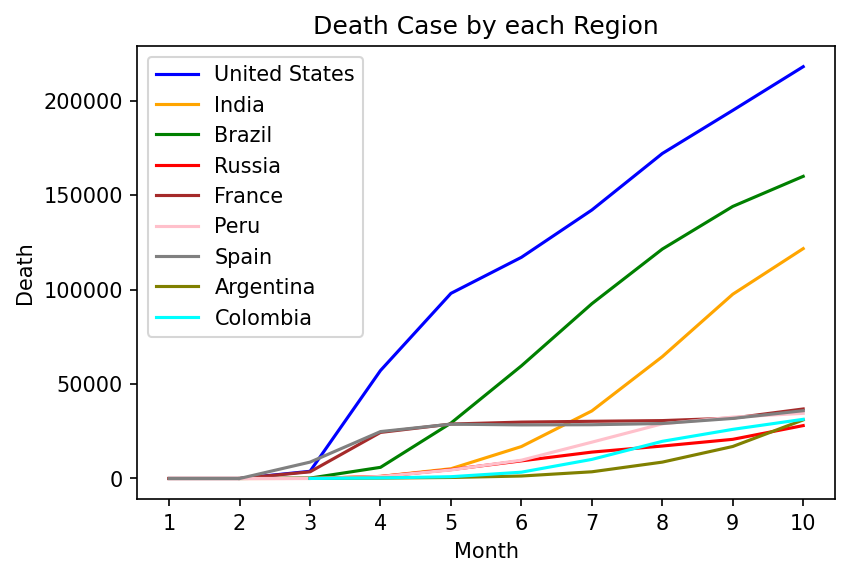

In [12]:

plt.figure(dpi=150)
plt.plot(US_maxdea.index, US_maxdea.values, color="blue")
plt.plot(IN_maxdea.index, IN_maxdea.values, color="orange")
plt.plot(BR_maxdea.index, BR_maxdea.values, color="green")
plt.plot(RU_maxdea.index, RU_maxdea.values, color="red")
plt.plot(FR_maxdea.index, FR_maxdea.values, color="brown")
plt.plot(PE_maxdea.index, PE_maxdea.values, color="pink")
plt.plot(SP_maxdea.index, SP_maxdea.values, color="gray")
plt.plot(AR_maxdea.index, AR_maxdea.values, color="olive")
plt.plot(CO_maxdea.index, CO_maxdea.values, color="cyan")
plt.ylabel('Death', color="black")
plt.xlabel('Month', color="black")
plt.title('Death Case by each Region', color="black")
plt.legend(['United States', 'India', 'Brazil', 'Russia', 'France', 'Peru', 'Spain','Argentina', 'Colombia'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

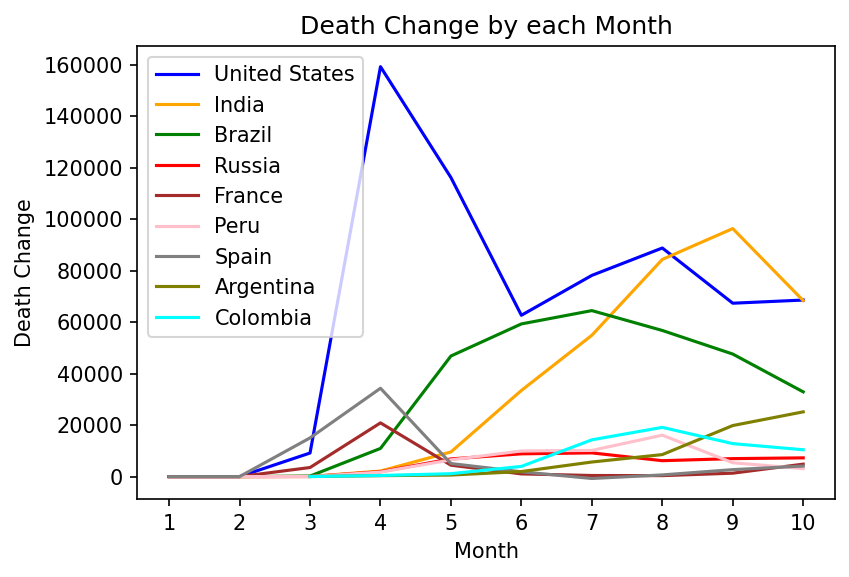

In [13]:
plt.figure(dpi=150)
plt.plot(US_sumdc.index, US_sumdc.values, color="blue")
plt.plot(IN_sumdc.index, IN_sumdc.values, color="orange")
plt.plot(BR_sumdc.index, BR_sumdc.values, color="green")
plt.plot(RU_sumdc.index, RU_sumdc.values, color="red")
plt.plot(FR_sumdc.index, FR_sumdc.values, color="brown")
plt.plot(PE_sumdc.index, PE_sumdc.values, color="pink")
plt.plot(SP_sumdc.index, SP_sumdc.values, color="gray")
plt.plot(AR_sumdc.index, AR_sumdc.values, color="olive")
plt.plot(CO_sumdc.index, CO_sumdc.values, color="cyan")
plt.ylabel('Death Change', color="black")
plt.xlabel('Month', color="black")
plt.title('Death Change by each Month', color="black")
plt.legend(['United States', 'India', 'Brazil', 'Russia', 'France', 'Peru', 'Spain','Argentina', 'Colombia'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

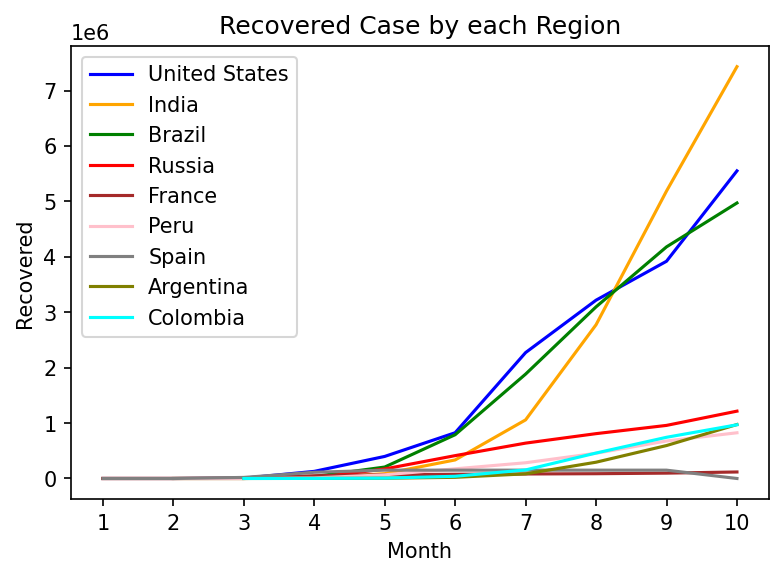

In [14]:
plt.figure(dpi=150)
plt.plot(US_maxrec.index, US_maxrec.values, color="blue")
plt.plot(IN_maxrec.index, IN_maxrec.values, color="orange")
plt.plot(BR_maxrec.index, BR_maxrec.values, color="green")
plt.plot(RU_maxrec.index, RU_maxrec.values, color="red")
plt.plot(FR_maxrec.index, FR_maxrec.values, color="brown")
plt.plot(PE_maxrec.index, PE_maxrec.values, color="pink")
plt.plot(SP_maxrec.index, SP_maxrec.values, color="gray")
plt.plot(AR_maxrec.index, AR_maxrec.values, color="olive")
plt.plot(CO_maxrec.index, CO_maxrec.values, color="cyan")
plt.ylabel('Recovered', color="black")
plt.xlabel('Month', color="black")
plt.title('Recovered Case by each Region', color="black")
plt.legend(['United States', 'India', 'Brazil', 'Russia', 'France', 'Peru', 'Spain','Argentina', 'Colombia'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

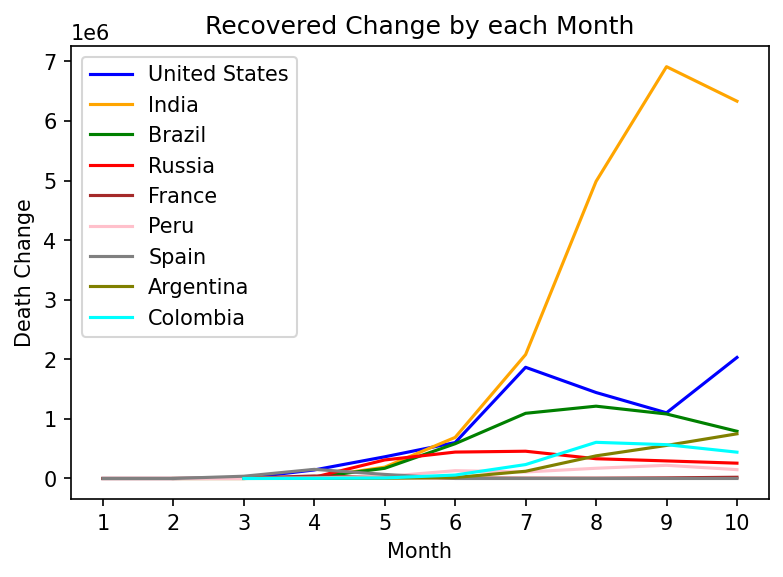

In [15]:
plt.figure(dpi=150)
plt.plot(US_sumrc.index, US_sumrc.values, color="blue")
plt.plot(IN_sumrc.index, IN_sumrc.values, color="orange")
plt.plot(BR_sumrc.index, BR_sumrc.values, color="green")
plt.plot(RU_sumrc.index, RU_sumrc.values, color="red")
plt.plot(FR_sumrc.index, FR_sumrc.values, color="brown")
plt.plot(PE_sumrc.index, PE_sumrc.values, color="pink")
plt.plot(SP_sumrc.index, SP_sumrc.values, color="gray")
plt.plot(AR_sumrc.index, AR_sumrc.values, color="olive")
plt.plot(CO_sumrc.index, CO_sumrc.values, color="cyan")
plt.ylabel('Death Change', color="black")
plt.xlabel('Month', color="black")
plt.title('Recovered Change by each Month', color="black")
plt.legend(['United States', 'India', 'Brazil', 'Russia', 'France', 'Peru', 'Spain','Argentina', 'Colombia'])
plt.xticks([1,2,3,4,5,6,7,8,9,10])
plt.show()

In [16]:
# check data by each region

key_list = list(dfo['location'].unique())

data_list = []
for i in key_list:
    data_list.append(dfo[dfo['location']==i]['population'].max())
    
dfo_loc = pd.DataFrame(data_list, key_list, columns=['population'])
dfo_loc['country'] = key_list

data_list = []
for i in key_list:
    data_list.append(dfo[dfo['location']==i]['median_age'].max())

dfo_loc['median_age'] = data_list

data_list = []
for i in key_list:
    data_list.append(dfo[dfo['location']==i]['hospital_beds_per_thousand'].max())

dfo_loc['hospital_beds_per_thousand'] = data_list


In [17]:
df_inner = pd.merge(df_most, dfo_loc, left_on='country', right_on='country')
df_inner

,maxcon,country,population,median_age,hospital_beds_per_thousand
0,8914806,United States,3.310026e+08,38.3,2.77
1,8137119,India,1.380004e+09,28.2,0.53
2,5535605,Brazil,2.125594e+08,33.5,2.20
3,1618116,Russia,1.459345e+08,39.6,8.05
4,1497438,Peru,3.297185e+07,29.1,1.60
5,1367625,France,6.527351e+07,42.0,5.98
6,1185678,Spain,4.675478e+07,45.5,2.97
7,1166911,Argentina,4.519578e+07,31.9,5.00
8,1074184,Colombia,5.088288e+07,32.2,1.71


Text(0.5, 1.0, 'Hospital Beds per thousand')

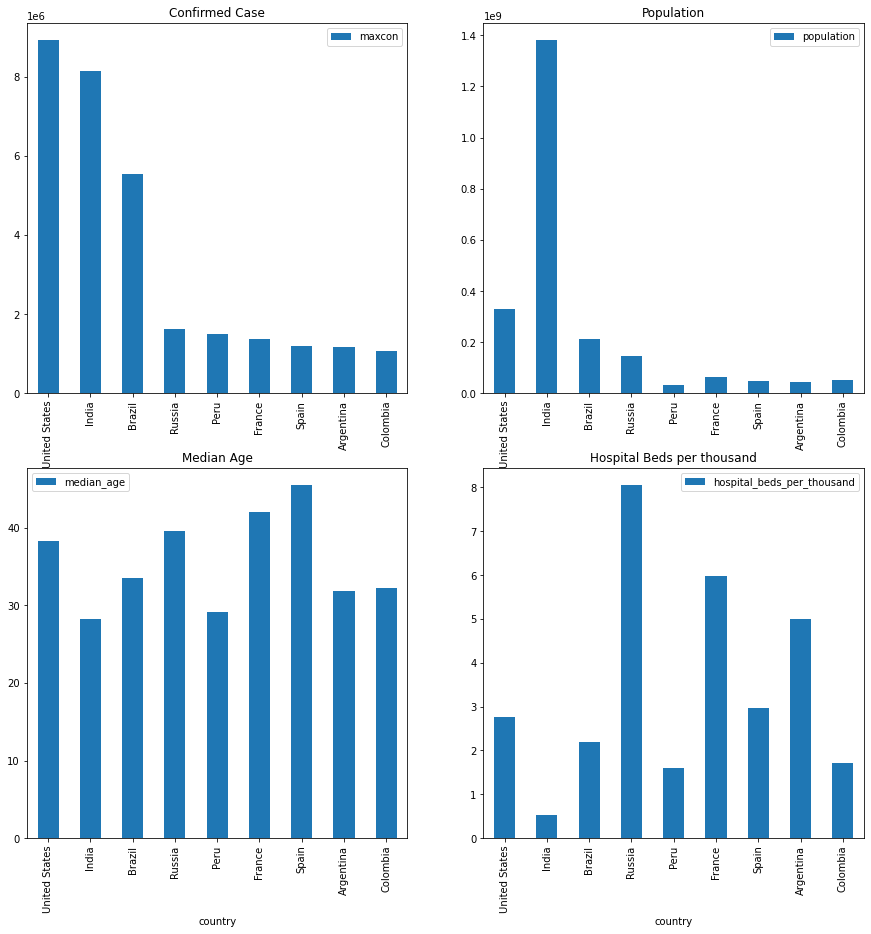

In [18]:
fig, axs = plt.subplots(2, 2,figsize=(15,15))

df_inner.plot(ax = axs[0,0], x = 'country', y = 'maxcon', kind = 'bar')
axs[0, 0].set_title('Confirmed Case')
df_inner.plot(ax = axs[0,1], x = 'country', y = 'population', kind = 'bar')
axs[0, 1].set_title('Population')
df_inner.plot(ax = axs[1,0], x = 'country', y = 'median_age', kind = 'bar')
axs[1, 0].set_title('Median Age')
df_inner.plot(ax = axs[1,1], x = 'country', y = 'hospital_beds_per_thousand', kind = 'bar')
axs[1, 1].set_title('Hospital Beds per thousand')



In [19]:
tempUS = df_US.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempIN = df_IN.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempBR = df_BR.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempRU = df_RU.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempPE = df_PE.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempFR = df_FR.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempSP = df_SP.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempAR = df_AR.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempCO = df_CO.drop(columns=['ID', 'Updated', 'Latitude', 'Longitude', 'ISO2', 'ISO3', 'Country_Region','AdminRegion1', 'AdminRegion2'])
tempUS.corr()

,Confirmed,ConfirmedChange,Deaths,DeathsChange,Recovered,RecoveredChange
Confirmed,1.000000,0.885915,0.971641,0.588478,0.957052,0.257952
ConfirmedChange,0.885915,1.000000,0.900127,0.752070,0.797603,0.243934
Deaths,0.971641,0.900127,1.000000,0.649594,0.894158,0.255657
DeathsChange,0.588478,0.752070,0.649594,1.000000,0.482837,0.175990
Recovered,0.957052,0.797603,0.894158,0.482837,1.000000,0.268252
RecoveredChange,0.257952,0.243934,0.255657,0.175990,0.268252,1.000000


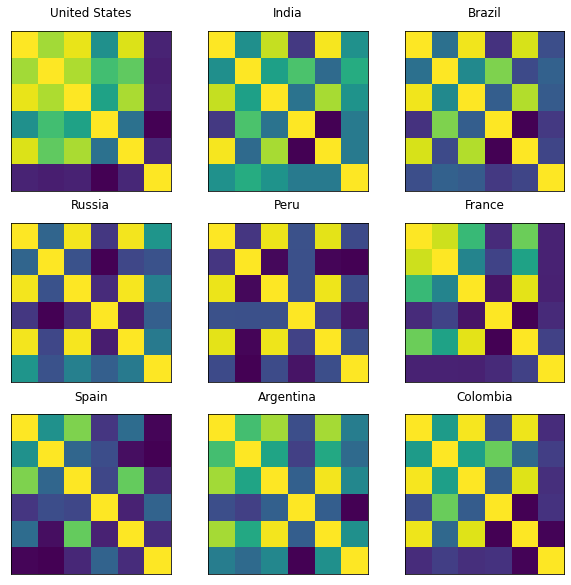

In [20]:
fig, ax = plt.subplots(nrows=3,ncols=3, figsize=(10,10))
ax[0,0].matshow(tempUS.corr())
ax[0,0].title.set_text('United States')
ax[0,1].matshow(tempIN.corr())
ax[0,1].title.set_text('India')
ax[0,2].matshow(tempBR.corr())
ax[0,2].title.set_text('Brazil')
ax[1,0].matshow(tempRU.corr())
ax[1,0].title.set_text('Russia')
ax[1,1].matshow(tempPE.corr())
ax[1,1].title.set_text('Peru')
ax[1,2].matshow(tempFR.corr())
ax[1,2].title.set_text('France')
ax[2,0].matshow(tempSP.corr())
ax[2,0].title.set_text('Spain')
ax[2,1].matshow(tempAR.corr())
ax[2,1].title.set_text('Argentina')
ax[2,2].matshow(tempCO.corr())
ax[2,2].title.set_text('Colombia')

ax[0,0].set_xticks([])
ax[0,0].set_yticks([])
ax[0,1].set_xticks([])
ax[0,1].set_yticks([])
ax[0,2].set_xticks([])
ax[0,2].set_yticks([])
ax[1,0].set_xticks([])
ax[1,0].set_yticks([])
ax[1,1].set_xticks([])
ax[1,1].set_yticks([])
ax[1,2].set_xticks([])
ax[1,2].set_yticks([])
ax[2,0].set_xticks([])
ax[2,0].set_yticks([])
ax[2,1].set_xticks([])
ax[2,1].set_yticks([])
ax[2,2].set_xticks([])
ax[2,2].set_yticks([])

plt.show()